
# Plotting
In this tutorial we will explore the basic plotting tools provided by `pykep` via its {py:class}`~pykep.plot` module. The module was built as to facilitate the incremental construction of plots showing trajectories and other important quantities of interest when planning/designing interplanetary missions.

We start importing the basics:

In [1]:
import pykep as pk
import numpy as np

%matplotlib inline

## 3D Plots

In most cases one would want to start creating a 3D empty canvas where to incrementally add details. To do so we can avoid a direct interaction with the backend `matplotlib` using the convenience {py:class}`~pykep.plot.make_3Daxis` factory:

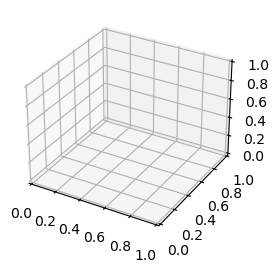

In [2]:
ax = pk.plot.make_3Daxis(figsize = (3,3));

We may then add the Sun and a few planets easily ... in the code below we will make use of the JPL low precision ephemerides, and thus use the {py:class}`~pykep.udpla.jpl_lp` User Defined Planet, but any other udpla would work.

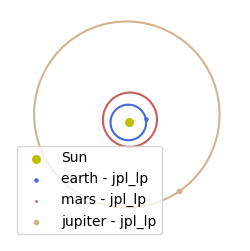

In [17]:
# Earth
udpla = pk.udpla.jpl_lp(body="EARTH")
earth = pk.planet(udpla)

# Mars
udpla = pk.udpla.jpl_lp(body="MARS")
mars = pk.planet(udpla)

#Jupiter
udpla = pk.udpla.jpl_lp(body="JUPITER")
jupiter = pk.planet(udpla)

# Plotting (both the orbit and the planet)
ax = pk.plot.make_3Daxis(figsize = (3,3))
pk.plot.add_sun(ax)

pk.plot.add_planet_orbit(ax, earth, plot_range = [0, 365.25], c = "royalblue", label = "")
pk.plot.add_planet(ax, earth, when = 0, c = "royalblue", s = 5)

pk.plot.add_planet_orbit(ax, mars, label = "", c = "indianred")
pk.plot.add_planet(ax, mars, when = 0, c = "indianred", s = 1)

pk.plot.add_planet_orbit(ax, jupiter, label = "", c = "tan")
pk.plot.add_planet(ax, jupiter, when = 0, c = "tan")

ax.legend()
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.axis('off')
ax.view_init(90,0)

In some cases it may be useful to add solar system planets at once to a plot. The {py:class}`~pykep.plot.add_solar_system` does just that:

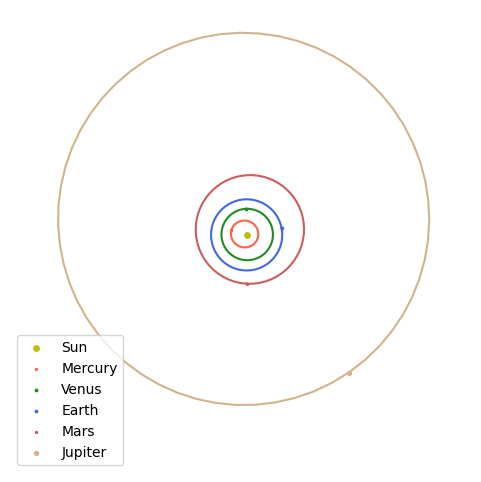

In [16]:
ax = pk.plot.make_3Daxis(figsize = (6,6))
pk.plot.add_solar_system(ax, bodies = [1,2,3,4,5])
ax.view_init(90,0)
ax.legend()
ax.axis('off')
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.view_init(90,0)